## Opens pkl file data and plots xf, final_avg_power

In [14]:
import pickle
import os
import re
import matplotlib.pyplot as plt
import obspy
from obspy import read
from obspy import Stream
import numpy as np
from obspy.signal.invsim import cosine_sac_taper


### Plots mean of xf and avg_power for all WAIS files

In [2]:

# pth = "pickles/"
# dirs = os.listdir(pth)
# tot_avg_power = 0
# tot_xf = 0
# num = 0
# for file in dirs:
#     if(file.endswith(".pkl")):
#         num = num + 1
        
#         # Included this if statement to see if partial-days were causing an issue,
#         # Excluding these days does lower the average.
# #         if(file.endswith("06T.pkl") or  file.endswith("15T.pkl")):
# #             continue
            
#         with open(pth + file,'rb') as f:
#             xf,avg_power = pickle.load(f)
#             tot_xf = tot_xf + xf
#             tot_avg_power = tot_avg_power + avg_power

# tot_avg_power = tot_avg_power/num
# tot_xf = tot_xf/num
# plt.plot(tot_xf,tot_avg_power , "-r")
# plt.grid
# plt.yscale("log")
# plt.xscale("log")

### Adds WAIS plot to best RIS plot

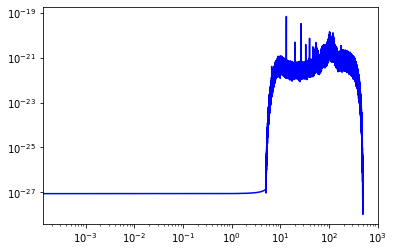

In [3]:
#test_PPSD_station_2000_2019-01-07T.pkl
with open("/data/fast1/time-ppsd/full_day_ris_ppsd.pkl",'rb') as f:
    xf_ris,avg_power_ris = pickle.load(f)

fig,ax=plt.subplots()
fig.patch.set_facecolor('white')
plt.plot(xf_ris,avg_power_ris , "-b")

# plt.plot(tot_xf,tot_avg_power , "-r")
plt.grid
plt.yscale("log")
plt.xscale("log")
plt.show()

## Plots the same day at every station and compares to RIS

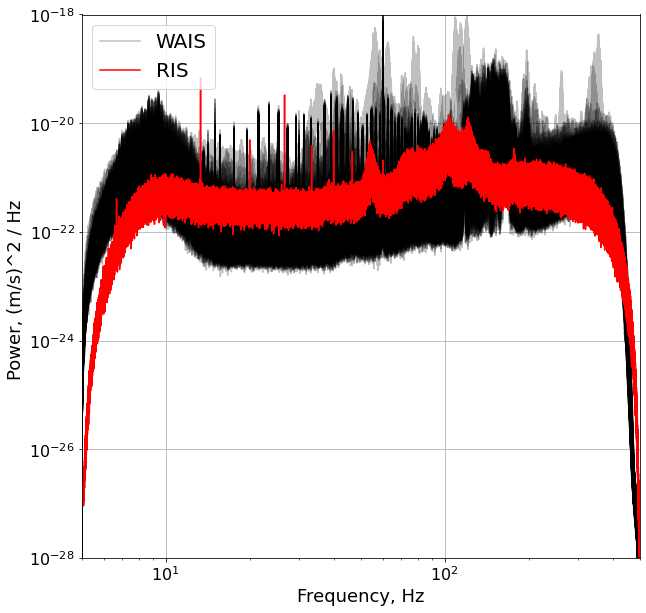

In [5]:
plt.close(fig)
pth = "/data/fast1/time-ppsd/"
# pth = "pickles/"
dirs = os.listdir(pth)

fig,ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')

first = 0
for i,file in enumerate(dirs):
    if(file.endswith(".pkl")):
#         if 'station_2060' not in file:
#             continue
        if(file.endswith("08T.pkl")):
            first = first + 1
            with open(pth + file,'rb') as f:
                xf,avg_power = pickle.load(f)
                taper = cosine_sac_taper(xf, (5,10,250,500))
                if first == 1:
                    plt.plot(xf,taper*avg_power , "-k", alpha = 0.25, label='WAIS')
                else:
                    plt.plot(xf,taper*avg_power , "-k", alpha = 0.25)
#                 plt.plot(xf,taper)
#                 if i > 20:
#                     break
plt.rcParams['font.size'] = 36
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 22
plt.plot(xf_ris,avg_power_ris , "-r",label='RIS')
plt.grid()
plt.legend(loc = 'upper left')
plt.yscale("log")
plt.xscale("log")
plt.xlim([5,500])
plt.ylim([10**(-28),10**(-18)])
plt.ylabel('Power, (m/s)^2 / Hz ')
plt.xlabel('Frequency, Hz')
plt.show()

### Creates a plot comparing all data of one station to RIS

##### Creates list of station numbers. Run once.

In [ ]:
station_pth = "/data/fast1/time/"
dirs = os.listdir(station_pth)
station_nums = []
for file in dirs:
    if file.endswith(".mseed"):
        station = re.search(r'(?<=TIME_WAIS_)\d+', file).group(0)
        station_nums.append(station)

In [ ]:
pickle_pth = "pickles/"
dirs = os.listdir(pickle_pth)

for station in station_nums[65:75]: #only run about 10 at a time
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    first = 0
    for file in dirs:
        if(file.endswith(".pkl")):
            if(file.endswith("06T.pkl") or  file.endswith("15T.pkl")):
                continue
            if ('station_%s'%station) not in file:
                continue
            first = first + 1
            with open(pickle_pth + file,'rb') as f:
                xf,avg_power = pickle.load(f)
                if(first == 1):
                    plt.plot(xf,avg_power , "-k", alpha = 0.25, label='Station %s'%station)
                else:
                    plt.plot(xf,avg_power , "-k", alpha = 0.25)
                    
        

    plt.plot(xf_ris,avg_power_ris , "-r",label='RIS')
    plt.grid
    plt.legend(loc='upper right')
    plt.yscale("log")
    plt.xscale("log")
    plt.savefig('RIS_comparison_plots/ris_compare_station_%s.png' %station)
    plt.close(fig)


In [ ]:
station_nums.index('2000')


### Looks through avg_power values to determine when RIS is noisier.

In [ ]:
indices = []

for station in station_nums[0:4]: #only run about 10 at a time
    for file in dirs:
        if(file.endswith(".pkl")):
            if(file.endswith("06T.pkl") or  file.endswith("15T.pkl")):
                continue
            day = re.search(r'(2019-01-.+T)', file).group(0)
            if ('station_%s'%station) not in file:
                continue
            with open(pickle_pth + file,'rb') as f:
                xf,avg_power = pickle.load(f)
            for i in np.arange(0,len(avg_power_ris)):
                if avg_power[i] < avg_power_ris[i]:
                    indices.append((station,day)) if (station,day) not in indices else indices

In [ ]:
indices